# assignment  Logistic regression

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("bank-full.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [2]:
df.shape

(45211, 17)

In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
X= df[['age','balance','day','duration','campaign','pdays','previous']]
Y=df[['y']]

<Axes: >

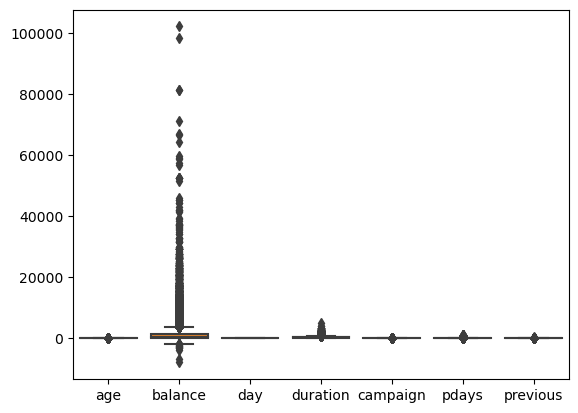

In [5]:
sns.boxplot(X)

In [6]:
X.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: >

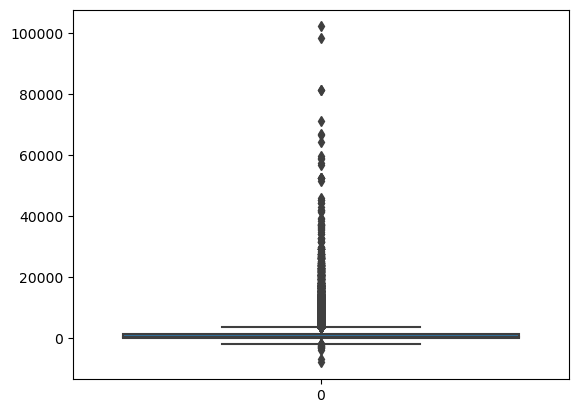

In [7]:
#boxplot
sns.boxplot(X['balance'])

In [8]:
X['balance'].skew()

8.360308326166326

<Axes: >

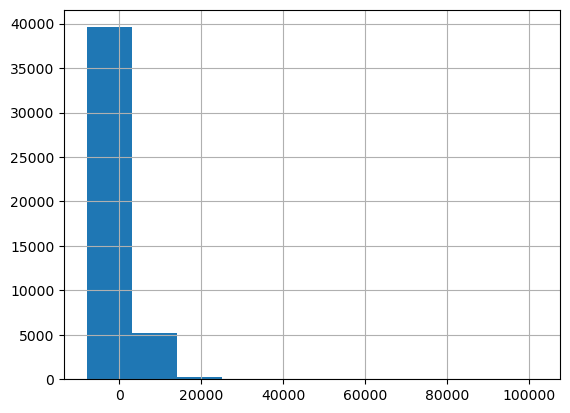

In [9]:
X['balance'].hist()  

In [10]:
X['balance'].kurt()

140.75154662504158

In [11]:
X['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: >

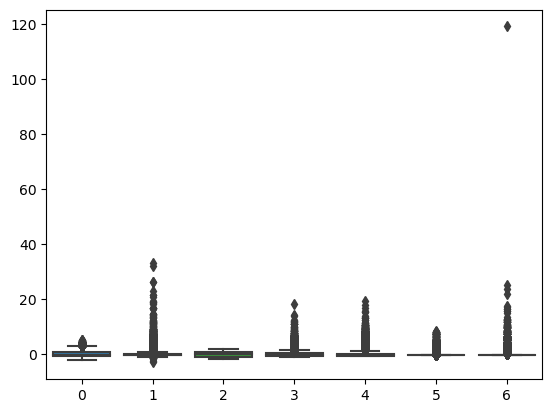

In [12]:
#standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X= SS.fit_transform(X)

sns.boxplot(SS_X)


Before Winsorization:
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

After Winsorization:
count    45211.000000
mean       907.472973
std       1071.696226
min       -172.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max       3093.600000
Name: balance_winsorized, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_8584\3898148293.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['balance' + '_winsorized'] = X['balance'].clip(lower=lower_bound, upper=upper_bound)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8584\3898148293.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['balance']=  X['balance' + '_winsorized']


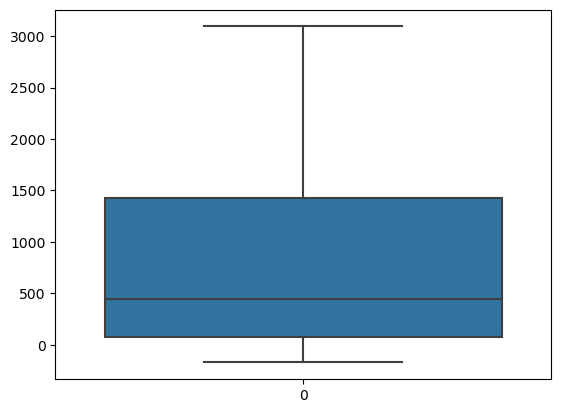

In [13]:
#clipping and  capping methods to  remove outliers

#removing outliers from balance  column 
# Define the percentile range for Winsorization
lower_percentile = 5  # Lower percentile
upper_percentile = 88  # Upper percentile


# Compute the lower and upper bounds for Winsorization
lower_bound = np.percentile(X['balance'], lower_percentile)
upper_bound = np.percentile(X['balance'], upper_percentile)

# Apply Winsorization to the variable with outliers
X['balance' + '_winsorized'] = X['balance'].clip(lower=lower_bound, upper=upper_bound)

# Check the effect of Winsorization
print("Before Winsorization:")
print(X['balance'].describe())

print("\nAfter Winsorization:")
print(X['balance' + '_winsorized'].describe())


sns.boxplot(X['balance' + '_winsorized'])


X['balance']=  X['balance' + '_winsorized']

Before Winsorization:
count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

After Winsorization:
count    45211.000000
mean       222.157041
std        147.638324
min         35.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        498.000000
Name: duration_winsorized, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_8584\3085001761.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration' + '_winsorized'] = X['duration'].clip(lower=lower_bound, upper=upper_bound)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8584\3085001761.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration']=  X['duration' + '_winsorized']


<Axes: >

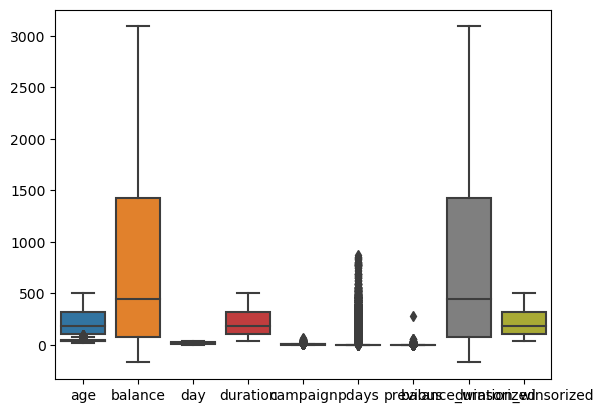

In [14]:
#removing outliers from duration   column 

# Define the percentile range for Winsorization
lower_percentile = 5  # Lower percentile
upper_percentile = 88  # Upper percentile


# Compute the lower and upper bounds for Winsorization
lower_bound = np.percentile(X['duration'], lower_percentile)
upper_bound = np.percentile(X['duration'], upper_percentile)

# Apply Winsorization to the variable with outliers
X['duration' + '_winsorized'] = X['duration'].clip(lower=lower_bound, upper=upper_bound)

# Check the effect of Winsorization
print("Before Winsorization:")
print(X['duration'].describe())

print("\nAfter Winsorization:")
print(X['duration' + '_winsorized'].describe())


sns.boxplot(X['duration' + '_winsorized'])


X['duration']=  X['duration' + '_winsorized']

sns.boxplot(X)

Before Winsorization:
count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

After Winsorization:
count    45211.000000
mean        26.590830
std         60.778049
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        173.000000
Name: pdays_winsorized, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_8584\1316907774.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pdays' + '_winsorized'] = X['pdays'].clip(lower=lower_bound, upper=upper_bound)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8584\1316907774.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pdays']=  X['pdays' + '_winsorized']


<Axes: >

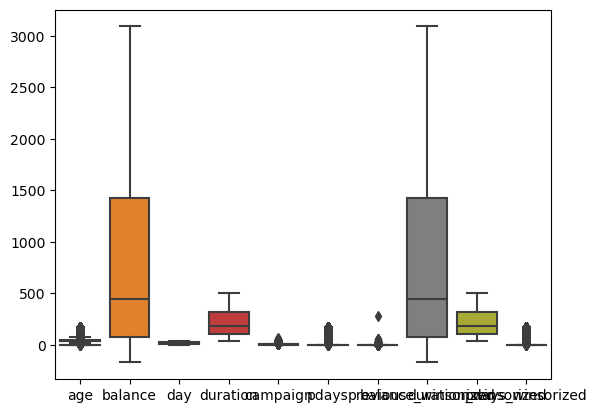

In [15]:
#removing outliers from duration   column 

# Define the percentile range for Winsorization
lower_percentile = 5  # Lower percentile
upper_percentile = 88  # Upper percentile


# Compute the lower and upper bounds for Winsorization
lower_bound = np.percentile(X['pdays'], lower_percentile)
upper_bound = np.percentile(X['pdays'], upper_percentile)

# Apply Winsorization to the variable with outliers
X['pdays' + '_winsorized'] = X['pdays'].clip(lower=lower_bound, upper=upper_bound)

# Check the effect of Winsorization
print("Before Winsorization:")
print(X['pdays'].describe())

print("\nAfter Winsorization:")
print(X['pdays' + '_winsorized'].describe())


sns.boxplot(X['pdays' + '_winsorized'])


X['pdays']=  X['pdays' + '_winsorized']

sns.boxplot(X)

In [16]:
#Data Transformation 
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["Target"]  = le.fit_transform(df['y'])
df.head()
Y= df["Target"]

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X

array([[ 1.60696496,  1.15288331, -1.29847633, ...,  1.15288331,
         0.26309827, -0.45396545],
       [ 0.28852927, -0.8197124 , -1.29847633, ..., -0.8197124 ,
        -0.48197396, -0.45396545],
       [-0.74738448, -0.84490639, -1.29847633, ..., -0.84490639,
        -0.98997776, -0.45396545],
       ...,
       [ 2.92540065,  2.0398982 ,  0.14341818, ...,  2.0398982 ,
         1.86839027,  2.4089419 ],
       [ 1.51279098, -0.22345476,  0.14341818, ..., -0.22345476,
         1.86839027, -0.45396545],
       [-0.37068857,  1.92549885,  0.14341818, ...,  1.92549885,
         0.94043667,  2.4089419 ]])

In [17]:
# step5: Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y, test_size=0.3)

# step6: Model fitting
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

Y_pred_train  = logreg.predict(X_train)
Y_pred_test   = logreg.predict(X_test)

In [18]:
# step8: Metrics
from sklearn.metrics import log_loss, accuracy_score

print("Log loss for Training data:",log_loss(Y_train,Y_pred_train).round(2))
print("Log loss for Test data:",log_loss(Y_test,Y_pred_test).round(2))

# Training accuracy and Test accuracy
print("Training Accuracy:",accuracy_score(Y_train,Y_pred_train).round(2))
print("Test Accuracy:",accuracy_score(Y_test,Y_pred_test).round(2))

Log loss for Training data: 4.2
Log loss for Test data: 4.23
Training Accuracy: 0.88
Test Accuracy: 0.88


In [19]:
# step9: Cross validation

training_accuracies = []
test_accuracies = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y, test_size=0.3, random_state=i)
    logreg.fit(X_train,Y_train)
    Y_pred_train  = logreg.predict(X_train)
    Y_pred_test   = logreg.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,Y_pred_test))
    
print("Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))

Cross validation Training Accuracy:  0.88
Cross validation Test Accuracy:  0.88


In [20]:
# model fitting
logreg.fit(SS_X,Y)

Y_pred = logreg.predict(SS_X)
Y_pred

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,Y_pred)
cm

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score:", accuracy_score(Y,Y_pred).round(2))
print("Sensitivity score:", recall_score(Y,Y_pred).round(2))
print("Precision score:", precision_score(Y,Y_pred).round(2))
print("F1 score:", f1_score(Y,Y_pred).round(2))
TN = cm[0,0]
FP = cm[1,0]
TNR = TN/(FP + TN)
print("Specificity score:", TNR.round(2))

Accuracy score: 0.88
Sensitivity score: 0.11
Precision score: 0.5
F1 score: 0.18
Specificity score: 0.89


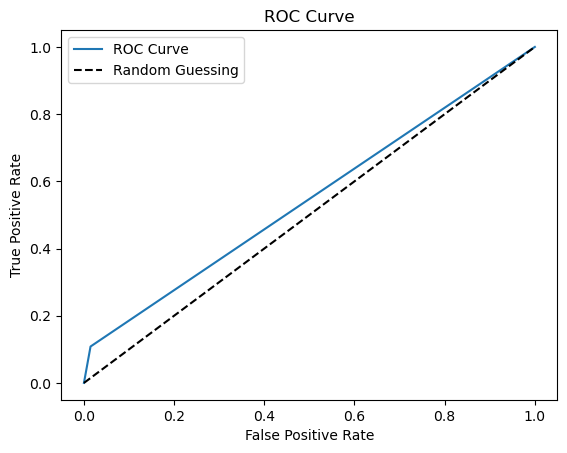

AUC: 0.5468672916725335


In [21]:
#performing roc
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_true are the true labels and y_pred_prob are the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y, Y_pred)
roc_df=pd.DataFrame(zip(fpr,tpr,thresholds),columns=["FPR","TPR","Thres_V"])
roc_df
# Plot ROC curvez
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC
auc = roc_auc_score(Y, Y_pred)
print('AUC:', auc)